# 1.Importing all necessary modules

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# 2.Import dataset

In [84]:
df = pd.read_csv('C:\DATASCIENCE\Projects\Invistico_Airline.csv')
df = pd.DataFrame(df)
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [86]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


In [87]:
print(df.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


##Renaming columns

In [88]:
for i in df:
    print(i)
    j = i.replace(' ','_')
    df.rename(columns={i:j.capitalize()},inplace=True)

satisfaction
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes


In [89]:
df.nunique()

Satisfaction                            2
Gender                                  2
Customer_type                           2
Age                                    75
Type_of_travel                          2
Class                                   3
Flight_distance                      5398
Seat_comfort                            6
Departure/arrival_time_convenient       6
Food_and_drink                          6
Gate_location                           6
Inflight_wifi_service                   6
Inflight_entertainment                  6
Online_support                          6
Ease_of_online_booking                  6
On-board_service                        6
Leg_room_service                        6
Baggage_handling                        5
Checkin_service                         6
Cleanliness                             6
Online_boarding                         6
Departure_delay_in_minutes            466
Arrival_delay_in_minutes              473
dtype: int64

##To find duplicated values


In [90]:
df.duplicated().sum()

0

##Removing columns

In [91]:
df = df.drop(['Departure/arrival_time_convenient','Gate_location','Online_support','Ease_of_online_booking'],axis = 1)
df.head()

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,4,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,2,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,2,0,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,4,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,4,3,2,0,2,4,2,5,0,0.0


##Count total number of rows and columns


In [92]:
df.shape

(129880, 19)

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\3130370679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Satisfaction", y="Count", data=usr, palette="deep").set_title('Customer Satisfaction Graph')


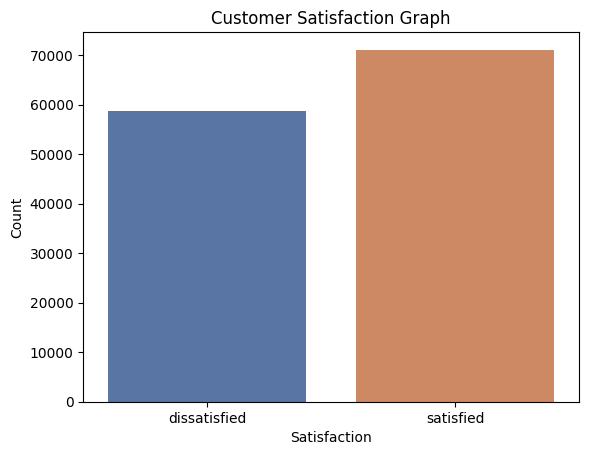

In [93]:
import seaborn as sns
usr = df.groupby('Satisfaction').size().reset_index(name= 'Count')
sns.barplot(x="Satisfaction", y="Count", data=usr, palette="deep").set_title('Customer Satisfaction Graph')
plt.show()

In [94]:
cols = df.columns.tolist()
cols[3], cols[5]= cols[5], cols[3]
cols[3], cols[4]= cols[4], cols[3]
df = df[cols]

In [95]:
y= df.iloc[:,0].values
df_cat = df.iloc[:,1:5]
df_num = df.iloc[:,5:]


In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
for column in df_cat.columns:
    df_cat[column] = labelencoder_x.fit_transform(df_cat[column])
df_cat

,Gender,Customer_type,Type_of_travel,Class
0,0,0,1,1
1,1,0,1,0
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
129875,0,1,1,1
129876,1,1,1,0
129877,1,1,1,1
129878,1,1,1,1


In [98]:
x_join= df_cat.join(df_num, how='inner')
x = x_join.values



Spliting the data into training set and test set

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
wcss_list= []

In [105]:
k_range = range(1,11)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

Fitting K-Nearest Neighbour Algorithm 

In [106]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric = "minkowski")
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

Predicting the test set result

In [107]:
y_pred = knn_model.predict(x_test)
ddf_Knn=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
ddf_Knn.head()


,Y_test,Y-pred
0,satisfied,satisfied
1,satisfied,satisfied
2,dissatisfied,dissatisfied
3,satisfied,satisfied
4,dissatisfied,dissatisfied


Evaluation and Classification Report of KNN

In [108]:
from sklearn.metrics import accuracy_score, classification_report
knn_accuracy = accuracy_score(y_test, y_pred)*100
print("KNN Accuracy: ", knn_accuracy, "%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy:  91.93871265783801 %
KNN Classification Report:
              precision    recall  f1-score   support

dissatisfied       0.90      0.93      0.91     17583
   satisfied       0.94      0.91      0.93     21381

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



##Classification with logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)



LogisticRegression()

In [110]:
y_pred2 = lr.predict(x_test)
acc2 = accuracy_score(y_test,y_pred2)


In [111]:
ddf_lr=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred2})
ddf_lr


,Y_test,Y-pred
0,satisfied,satisfied
1,satisfied,satisfied
2,dissatisfied,satisfied
3,satisfied,satisfied
4,dissatisfied,dissatisfied
...,...,...
38959,dissatisfied,dissatisfied
38960,dissatisfied,dissatisfied
38961,dissatisfied,satisfied
38962,dissatisfied,dissatisfied


In [112]:
lr_accuracy = accuracy_score(y_test, y_pred2)*100
print("Logistic regression Accuracy: ", lr_accuracy ,"%")
print(classification_report(y_test,y_pred2))

Logistic regression Accuracy:  82.93553023303562 %
              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     17583
   satisfied       0.84      0.85      0.84     21381

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964



In [113]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)


RandomForestClassifier()

In [114]:
rf_pred = rf_model.predict(x_test)
ddf_rf=pd.DataFrame({"Y_test":y_test,"Y-pred":rf_pred})
print(ddf_rf)


             Y_test        Y-pred
0         satisfied     satisfied
1         satisfied     satisfied
2      dissatisfied  dissatisfied
3         satisfied     satisfied
4      dissatisfied  dissatisfied
...             ...           ...
38959  dissatisfied  dissatisfied
38960  dissatisfied  dissatisfied
38961  dissatisfied  dissatisfied
38962  dissatisfied  dissatisfied
38963  dissatisfied  dissatisfied

[38964 rows x 2 columns]


In [115]:
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print("Random Forest Accuracy: ", rf_accuracy, "%")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy:  95.04157684016015 %
              precision    recall  f1-score   support

dissatisfied       0.94      0.95      0.95     17583
   satisfied       0.96      0.95      0.95     21381

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



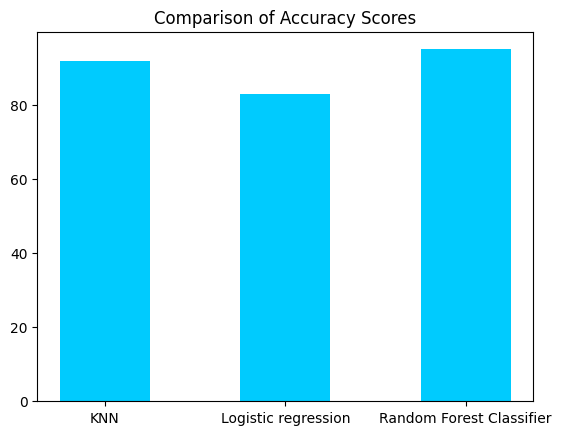

In [116]:
x = np.array(["KNN","Logistic regression", "Random Forest Classifier"])
y = np.array([knn_accuracy,lr_accuracy,rf_accuracy])
plt.bar(x, y, color="#00CBFE", width=0.5)
plt.title('Comparison of Accuracy Scores')
plt.show()